In [1]:
# run this cell to install Julia
# F5 to refresh

%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools PyCall PyPlot"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2021-10-29 02:44:18 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package PyCall...
Installing Julia package PyPlot...
Installing Julia package CUDA...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then


In [2]:
a=[1]

In [ ]:
# Adding packages
# don't need to run the 2nd time

# using Pkg
# Pkg.add("Plots");
# Pkg.add("GR");
# Pkg.add("Plotly");
# Pkg.add("LinearAlgebra");

In [ ]:
#By default, Julia only outputs the last line of code to the screen.
x=cos(4pi/15)+log(6)
y=4

4

In [ ]:
#Vectors and Matrices

using LinearAlgebra

x=[1 3 6]
println("x: ", norm(x,Inf))

y=[3; 5; -2]
A= [2 0 1; 
    3 1 4; 
    0 1 5]
println("A: ",A)
println("Ay: ", A*y)

println("norm A 1 (max column): ", opnorm(A, 1))                # norm 1 (maximum column)
println("norm A inf (max row): ", opnorm(A, Inf))               # norm inf
println("norm A F (square root of sum of square): ", norm(A))   # norm F (square root of sum of square)
println("vector: ", [norm(A*y) opnorm(A)*norm(y)])

x: 6.0
A: [2 0 1; 3 1 4; 0 1 5]
Ay: [4, 6, -5]
norm A 1 (max column): 10.0
norm A inf (max row): 8.0
norm A F (square root of sum of square): 7.54983443527075
vector: [8.774964387392123 43.388776681799335]


In [ ]:
#Defining a function

function f(x)
  return x^2
end

print("f(11) = ", f(11))

f(11) = 121

In [ ]:
#Evaluating functions acting on vectors

x=[-1 0 2 5]
print("f(x) = ", f.(x))

f(x) = [1 0 4 25]

In [ ]:
# Intializing plotting packages
# run only one time

# using Plots
# plotly();
# gr();

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/tung/.julia/packages/Plots/uCh2y/src/backends.jl:372


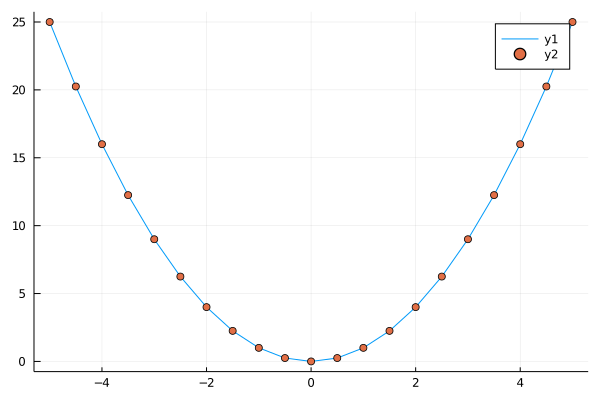

In [ ]:
#x=-5:5
x = -5:0.5:5
y = f.(x)
plot(x,y)
scatter!(x,y)

In [ ]:
#Printing with variables

x=75/5
println("The correct answer is $x")

The correct answer is 15.0


In [ ]:
# While loops

bottles=5

while bottles>0
  println("$bottles bottles of beer on the wall. $bottles bottles of beer. Take one down, pass it around,")
  bottles -=1
  println("$bottles bottles of beer on the wall.\n")
end

5 bottles of beer on the wall. 5 bottles of beer. Take one down, pass it around,
4 bottles of beer on the wall.

4 bottles of beer on the wall. 4 bottles of beer. Take one down, pass it around,
3 bottles of beer on the wall.

3 bottles of beer on the wall. 3 bottles of beer. Take one down, pass it around,
2 bottles of beer on the wall.

2 bottles of beer on the wall. 2 bottles of beer. Take one down, pass it around,
1 bottles of beer on the wall.

1 bottles of beer on the wall. 1 bottles of beer. Take one down, pass it around,
0 bottles of beer on the wall.



In [ ]:
#for loops

for j=1:10
  k=j^2
  l=j^3
  println("$j, $k, $l")
end

1, 1, 1
2, 4, 8
3, 9, 27
4, 16, 64
5, 25, 125
6, 36, 216
7, 49, 343
8, 64, 512
9, 81, 729
10, 100, 1000


In [ ]:
MultiplicationTable=zeros(5,5)

for i in 1:5, j in 1:5
  MultiplicationTable[i,j]=i*j
end

MultiplicationTable

5×5 Array{Float64,2}:
 1.0   2.0   3.0   4.0   5.0
 2.0   4.0   6.0   8.0  10.0
 3.0   6.0   9.0  12.0  15.0
 4.0   8.0  12.0  16.0  20.0
 5.0  10.0  15.0  20.0  25.0

In [ ]:
M = [i*j for i in 1:3, j in 1:4]
# print(typeof(M))

3×4 Array{Int64,2}:
 1  2  3   4
 2  4  6   8
 3  6  9  12

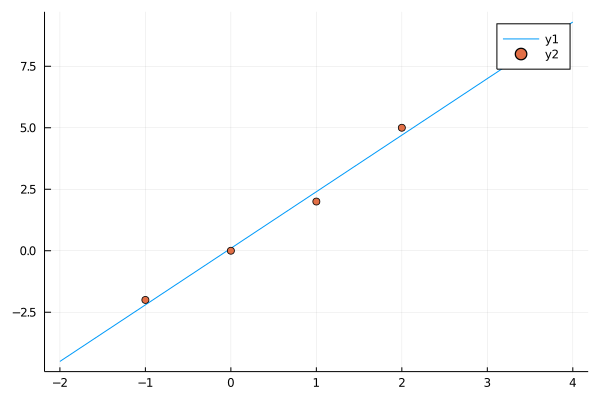

In [ ]:
# linear regression

x=[-1; 0; 1; 2]
y=[-2, 0, 2, 5]

A=[x ones(4,1)]

z=(A'A)\(A'y)

function g(x)
  return z[1]*x + z[2]
end

s=-2:.5:4

t=g.(s)
plot(s,t)
scatter!(x,y)